# Perceptron for classification

In [27]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [22]:
class Perceptron_classifier:
    def __init__(self, eta, random_state=1):
        self.eta = eta # learning rate
        self.random_state = random_state

    def predict(self, X):
        return np.where(np.dot(X, self.w_) + self.b_ >=0, 1, 0)

    def fit(self, X, y, n_epochs=50):
        np.random.seed(self.random_state)
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.errors_ = []

        for _ in range(n_epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0)
            self.errors_.append(errors)
        return self

In [23]:
iris = load_iris(as_frame=True)
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [24]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


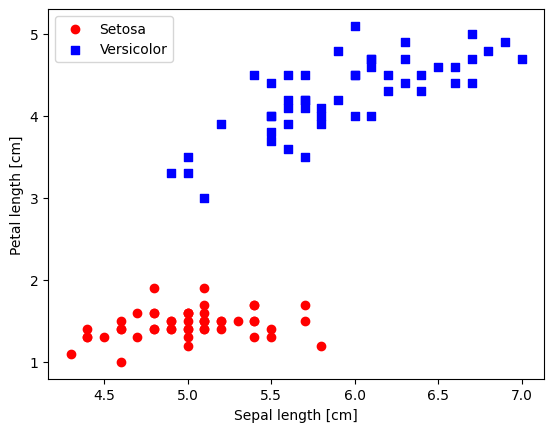

In [25]:
y = df.iloc[0:100, 4].values
X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

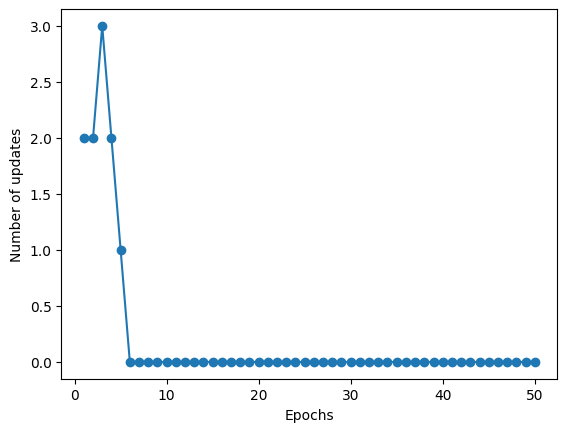

In [26]:
perceptron_clf = Perceptron_classifier(eta=0.1)
perceptron_clf.fit(X, y)
plt.plot(range(1, len(perceptron_clf.errors_) + 1), perceptron_clf.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

In [29]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # setup marker generator and color map
    markers = ('o', 's', '^', 'v', '<')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
        y=X[y == cl, 1],
        alpha=0.8,
        c=colors[idx],
        marker=markers[idx],
        label=f'Class {cl}',
        edgecolor='black')

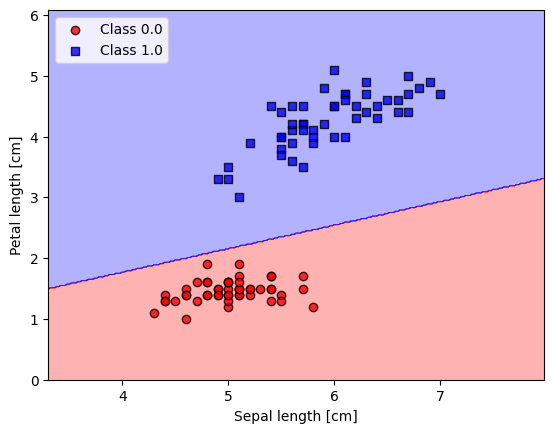

In [30]:
plot_decision_regions(X, y, classifier=perceptron_clf)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Adaptive linear neuron
with linear function of activation

In [31]:
class Adalin_neuron:
    def __init__(self, eta, random_state=1):
        self.eta = eta # learning rate
        self.random_state = random_state

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >=0, 1, 0)

    def fit(self, X, y, n_epochs=50):
        np.random.seed(self.random_state)
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size = X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for _ in range(n_epochs):
            net_input = self.net_input(X)
            outputs = self.activation(net_input)
            errors = y - outputs
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

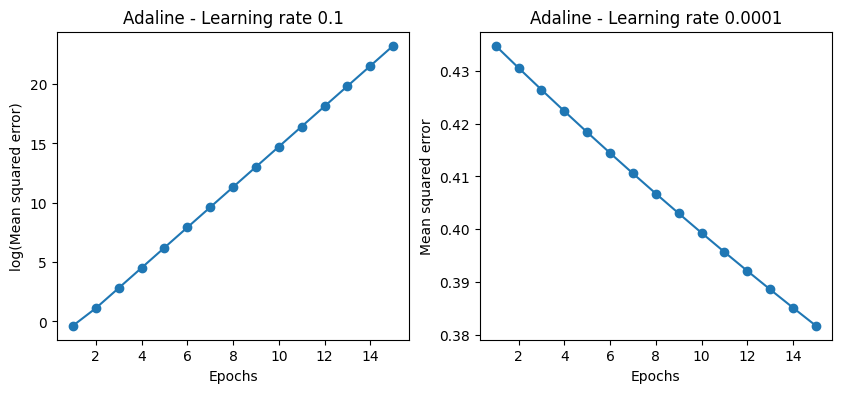

In [32]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = Adalin_neuron(eta=0.1).fit(X, y, n_epochs=15)
ax[0].plot(range(1, len(ada1.losses_) + 1),
np.log10(ada1.losses_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Mean squared error)')
ax[0].set_title('Adaline - Learning rate 0.1')
ada2 = Adalin_neuron(eta=0.0001).fit(X, y, n_epochs=15)
ax[1].plot(range(1, len(ada2.losses_) + 1),
ada2.losses_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Mean squared error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

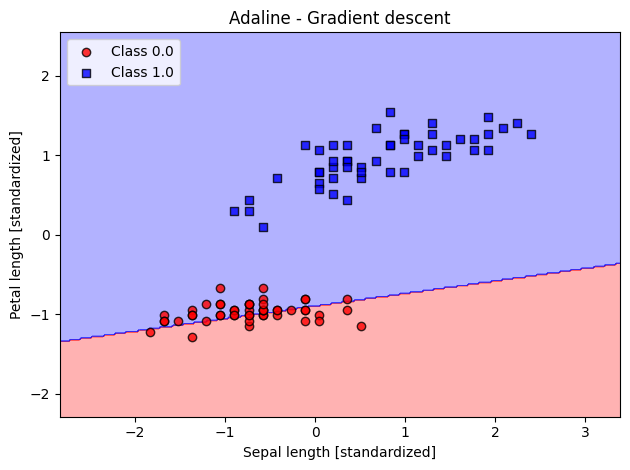

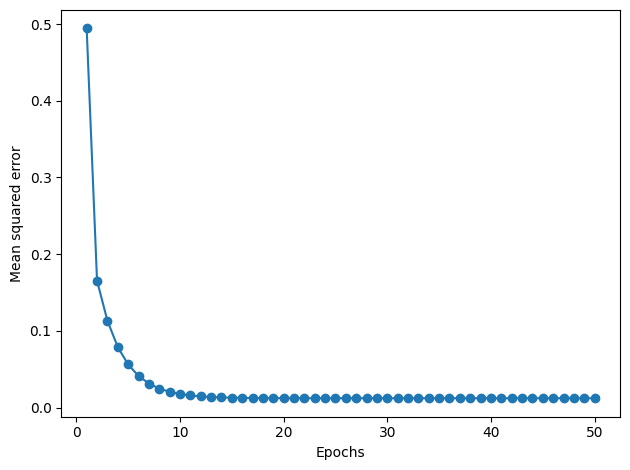

In [33]:
X_std = np.copy(X)
X_std[:,0] = (X[:,0] - X[:,0].mean()) / X[:,0].std()
X_std[:,1] = (X[:,1] - X[:,1].mean()) / X[:,1].std()
ada_gd = Adalin_neuron(eta=0.5)
ada_gd.fit(X_std, y)
plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_gd.losses_) + 1),
ada_gd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Mean squared error')
plt.tight_layout()
plt.show()

In [39]:
class Adalin_neuron_SGD:
    def __init__(self, eta, random_state=None, shuffle=True):
        self.eta = eta # learning rate
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state

    def _initialize_weights(self, m):
        np.random.seed(self.random_state)
        self.w_ = np.random.normal(loc=0.0, scale=0.01, size=m)
        self.b_ = np.float_(0.)
        self.w_initialized = True

    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (target - output)
        self.w_ += self.eta * 2.0 * xi * (error)
        self.b_ += self.eta * 2.0 * error
        loss = error**2
        return loss
    
    def partial_fit(self, X, y):
        if not self.w_initialized:
            self._initialize_weights(X.shape[1])
        if y.ravel().shape[0] > 1:
            for xi, target in zip(X, y):
                self._update_weights(xi, target)
        else:
            self._update_weights(X, y)
        return self
    
    def fit(self, X, y, n_epochs=15):
        self._initialize_weights(X.shape[1])
        self.losses_ = []
        for i in range(n_epochs):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            losses = []
            for xi, target in zip(X, y):
                losses.append(self._update_weights(xi, target))
            avg_loss = np.mean(losses)
            self.losses_.append(avg_loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    def _shuffle(self, X, y):
        r = np.random.permutation(len(y))
        return X[r], y[r]

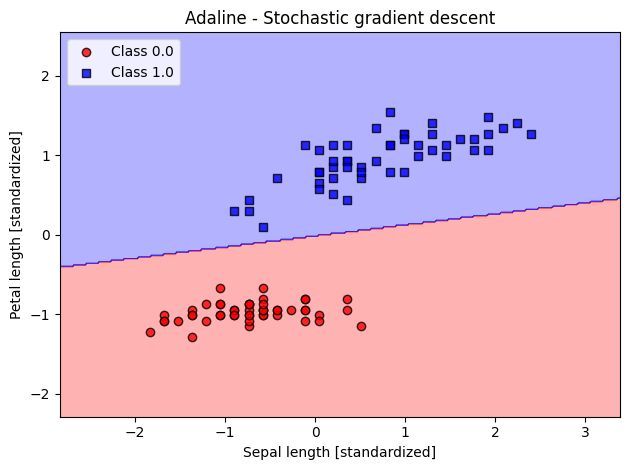

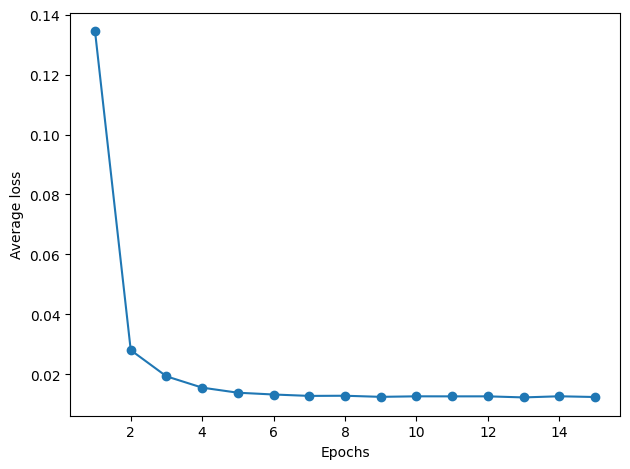

In [40]:
ada_sgd = Adalin_neuron_SGD(eta=0.01, random_state=1)
ada_sgd.fit(X_std, y, n_epochs=15)
plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title('Adaline - Stochastic gradient descent')
plt.xlabel('Sepal length [standardized]')
plt.ylabel('Petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.losses_) + 1), ada_sgd.losses_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average loss')
plt.tight_layout()
plt.show()